In [ ]:
sqimport os
# folder path
base_dir = 'C:\Users\junch\Documents\Summer 2022 Research'
'''
bainite_train_dir = os.path.join(base_dir, 'training_set/bainite')
bainite_validation_dir = os.path.join(base_dir, 'validation_set/bainite')
martensite_train_dir = os.path.join(base_dir, 'training_set/martensite')
martensite_validation_dir = os.path.join(base_dir, 'validation_set/martensite')
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


"\nbainite_train_dir = os.path.join(base_dir, 'training_set/bainite')\nbainite_validation_dir = os.path.join(base_dir, 'validation_set/bainite')\nmartensite_train_dir = os.path.join(base_dir, 'training_set/martensite')\nmartensite_validation_dir = os.path.join(base_dir, 'validation_set/martensite')\n"

In [ ]:
# define bainite dir with original dataset
bainite_dir = os.path.join(base_dir, 'N5_BAINITE')

In [ ]:
bainite_names = [img for img in os.listdir(bainite_dir) if os.path.splitext(img)[-1] == '.png']

In [ ]:
print(bainite_names)

['10000X_01.png', '10000X_02.png', '10000X_03.png', '10000X_04.png', '10000X_05.png', '10000X_06.png', '15000X_01.png', '6000X_02.png', '20000X.png', '5000X.png', '6000X_01.png', '7500X.png', '12500X.png', '15000X_02.png', '15000X_04.png', '15000X_05.png', '15000X_03.png', '25500X.png']


In [ ]:
bainite_magnifications = [name.split('X')[0] for name in bainite_names]

In [ ]:
print(bainite_magnifications)

['10000', '10000', '10000', '10000', '10000', '10000', '15000', '6000', '20000', '5000', '6000', '7500', '12500', '15000', '15000', '15000', '15000', '25500']


In [ ]:
# define martensite dir with original dataset
martensite_dir = os.path.join(base_dir, 'N5_MARTENSITE')

In [ ]:
martensite_names = [img for img in os.listdir(martensite_dir) if os.path.splitext(img)[-1] == '.png']

In [ ]:
print(martensite_names)

['10000X_06.png', '10000X_01.png', '10000X_02.png', '10000X_03.png', '10000X_04.png', '10000X_05.png', '6000X_01.png', '6000X_02.png', '6000X_03.png', '6000X_04.png', '6000X_05.png', '6000X_06.png', '15000X_01.png', '15000X_02.png', '15000X_03.png', '20000X_01.png', '20000X_02.png', '20000X_03.png', '20000X_04.png', '30000X_01.png']


In [ ]:
martensite_magnifications = [name.split('X')[0] for name in martensite_names]

In [ ]:
print(martensite_magnifications)

['10000', '10000', '10000', '10000', '10000', '10000', '6000', '6000', '6000', '6000', '6000', '6000', '15000', '15000', '15000', '20000', '20000', '20000', '20000', '30000']


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import os

In [ ]:
# load images from directory folder into list 
def load_images_from_folder(folder, nameList):
    images = []
    for filename in nameList:
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
# resize image
def resize_img(height, width, img):
  dim = (height, width)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized
  

In [ ]:
# grayscale image (one image only)
def gray(img):
  return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
# load images from directory
bainite_dataset = load_images_from_folder(bainite_dir, bainite_names)

In [ ]:
martensite_dataset = load_images_from_folder(martensite_dir, martensite_names)

(1670, 2021, 3)
20
10000X_02.png


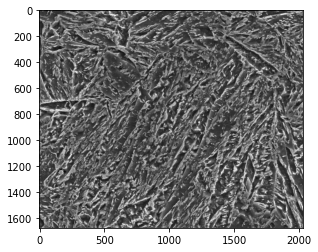

In [ ]:
# see image size and amount
print(martensite_dataset[0].shape)
print(len(martensite_dataset))
plt.imshow(martensite_dataset[2])
print(martensite_names[2])

In [ ]:
print(bainite_dataset[0].shape)
print(len(bainite_dataset))

(1677, 2029, 3)
18


In [ ]:
# preprocessed image array
bainite_dataset_processed = []
for img in bainite_dataset:
  # grayscale image
  img = gray(img)
  # resize image
  img = resize_img(2016, 1568, img)
  # append images into list
  bainite_dataset_processed.append(img)

In [ ]:
martensite_dataset_processed = []
for img in martensite_dataset:
  img = gray(img)
  img = resize_img(2016, 1568, img)
  martensite_dataset_processed.append(img)

In [ ]:
# check for dataset format
print(len(bainite_dataset))
print(bainite_dataset[0].shape)
print(bainite_dataset_processed[0].shape)

18
(1677, 2029, 3)
(1568, 2016)


In [ ]:
print(len(martensite_dataset))
print(martensite_dataset[0].shape)
print(martensite_dataset_processed[0].shape)

20
(1670, 2021, 3)
(1568, 2016)


(1568, 2016)


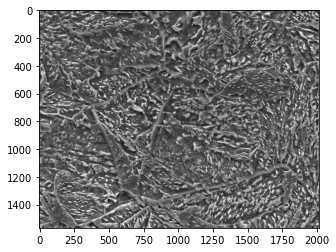

In [ ]:
# plot original image
print(bainite_dataset_processed[0].shape)
# cv2.image (height, width)
plt.imshow(bainite_dataset_processed[0], cmap='gray')

(1568, 2016)


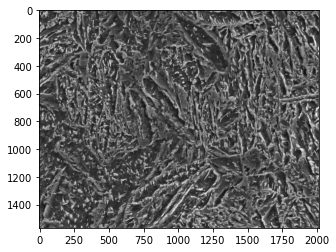

In [ ]:
# plot preprocessed image
print(martensite_dataset_processed[0].shape)
# cv2.image (height, width)
plt.imshow(martensite_dataset_processed[0], cmap='gray')

In [ ]:
# define directory for cropped images
bainite_cropped_dir = os.path.join(base_dir, 'Bainite_scaled_cropped')

In [ ]:
martensite_cropped_dir = os.path.join(base_dir, 'Martensite_scaled_cropped')

(224, 224)


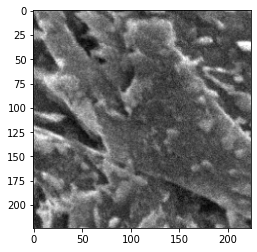

In [ ]:
# set starting coordinates and width and height for cropping
x = 0
y = 1568
# 224 x 224 is standard input size for various deep learning model
h = 224
w = 224
# numpy image slicing to crop image
crop_img = bainite_dataset_processed[0][y-h:y, x:x+w]
plt.imshow(crop_img, cmap='gray')
print(crop_img.shape)

In [ ]:
# custom method to crop image using numpy slicing
def scaledCropSave(saved_path, imageList, magnificationList):
    for i in range(len(imageList)):
        if magnificationList[i] < 10000:
            # 224 / 2 = 112
            for y in range(int(imageList[i].shape[0] / 112)):
                for x in range(int(imageList[i].shape[1] / 112)):
                    y0 = y * 112
                    x0 = x * 112
                    cropped_img = imageList[i][y0:y0 + 112, x0:x0 + 112]
                    cropped_img = resize_img(224, 224, cropped_img)
                    # save cropped image to directory
                    name = str(i) + '_' + str(y) + '_' + str(x) + '.png'
                    cv2.imwrite(os.path.join(saved_path, name) , cropped_img)
                    if not cv2.imwrite(os.path.join(saved_path, name) , cropped_img):
                      raise Exception('could not write')
        elif magnificationList[i] == 10000 or magnificationList[i] == 12500:
            for y in range(int(imageList[i].shape[0] / 224)):
                for x in range(int(imageList[i].shape[1] / 224)):
                    y0 = y * 224
                    x0 = x * 224
                    cropped_img = imageList[i][y0:y0 + 224, x0:x0 + 224]
                    # save cropped image to directory
                    name = str(i) + '_' + str(y) + '_' + str(x) + '.png'
                    cv2.imwrite(os.path.join(saved_path, name) , cropped_img)
        elif magnificationList[i] == 15000:
            # 224*1.5 = 336
            img = resize_img(2016, 1680, imageList[i])
            for y in range(int(img.shape[0] / 336)):
                for x in range(int(img.shape[1] / 336)):
                    y0 = y * 336
                    x0 = x * 336
                    cropped_img = img[y0:y0 + 336, x0:x0 + 336]
                    cropped_img = resize_img(224, 224, cropped_img)
                    # save cropped image to directory
                    name = str(i) + '_' + str(y) + '_' + str(x) + '.png'
                    cv2.imwrite(os.path.join(saved_path, name) , cropped_img)
        elif magnificationList[i] == 20000 or magnificationList[i] == 25500:
            # 224*2 = 448
            for y in range(int(imageList[i].shape[0] / 448)):
                for x in range(int(imageList[i].shape[1] / 448)):
                    y0 = y * 448
                    x0 = x * 448
                    cropped_img = imageList[i][y0:y0 + 448, x0:x0 + 448]
                    cropped_img = resize_img(224, 224, cropped_img)
                    # save cropped image to directory
                    name = str(i) + '_' + str(y) + '_' + str(x) + '.png'
                    cv2.imwrite(os.path.join(saved_path, name) , cropped_img)
        elif magnificationList[i] == 30000:
            # 224*3 = 672
            img = resize_img(2016, 1344, imageList[i])
            for y in range(int(imageList[i].shape[0] / 672)):
                for x in range(int(imageList[i].shape[1] / 672)):
                    y0 = y * 672
                    x0 = x * 672
                    cropped_img = imageList[i][y0:y0 + 672, x0:x0 + 672]
                    cropped_img = resize_img(224, 224, cropped_img)
                    # save cropped image to directory
                    name = str(i) + '_' + str(y) + '_' + str(x) + '.png'
                    cv2.imwrite(os.path.join(saved_path, name) , cropped_img)


In [ ]:
martensite_magnifications = [int(x) for x in martensite_magnifications]
bainite_magnifications = [int(x) for x in bainite_magnifications]

In [ ]:
print(max(martensite_magnifications))
print(min(martensite_magnifications))
print(max(bainite_magnifications))
print(min(bainite_magnifications))

30000
6000
25500
5000


In [ ]:
# crop all images in bainite_dataset_processed list
scaledCropSave(bainite_cropped_dir, bainite_dataset_processed, bainite_magnifications)

In [ ]:
scaledCropSave(martensite_cropped_dir, martensite_dataset_processed, martensite_magnifications)

In [ ]:
print(bainite_cropped_dir)

/content/drive/My Drive/SURE Summer 2022/Bainite_scaled_cropped
